# IS597MLC Final Project: Predictive Analysis of Online News Article Share Volume

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data


In [2]:
# read in data from input csv file

df = pd.read_csv('data/OnlineNewsPopularity.csv', sep=',', skipinitialspace=True, dtype={'weekday_is_monday':'int8', 'weekday_is_tuesday':'int8', 'weekday_is_wednesday':'int8', 'weekday_is_thursday':'int8', 'weekday_is_friday':'int8', 'weekday_is_saturday':'int8', 'weekday_is_sunday':'int8', 'is_weekend':'int8', 'data_channel_is_socmed':'int8', 'data_channel_is_lifestyle':'int8', 'data_channel_is_entertainment':'int8', 'data_channel_is_bus':'int8', 'data_channel_is_tech':'int8', 'data_channel_is_world':'int8'})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [4]:
#check column titles have no space
df.columns = df.columns.str.strip()

In [5]:
##### Check number of rows and columns
print("No of Rows: {}".format(df.shape[0]))
print("No of Columns: {}".format(df.shape[1]))

##### Check the last 3 instances (rows)
print("\nData View: First 5 Instances")
df.head()

No of Rows: 39644
No of Columns: 61

Data View: First 5 Instances


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Descriptive Data Analysis and Visualization

* **Look at the data and create a statistical summary of the numerical features.**  

In [6]:
# display data types of each attribute and see if there are any null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [7]:
# display count, mean, min and max values for each attribute.
df.describe().T[['count', 'mean', 'min', 'max']]


,count,mean,min,max
timedelta,39644.0,354.530471,8.00000,731.000000
n_tokens_title,39644.0,10.398749,2.00000,23.000000
n_tokens_content,39644.0,546.514731,0.00000,8474.000000
n_unique_tokens,39644.0,0.548216,0.00000,701.000000
n_non_stop_words,39644.0,0.996469,0.00000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,0.00000,650.000000
num_hrefs,39644.0,10.883690,0.00000,304.000000
num_self_hrefs,39644.0,3.293638,0.00000,116.000000
num_imgs,39644.0,4.544143,0.00000,128.000000
num_videos,39644.0,1.249874,0.00000,91.000000


In [8]:
# Iterate over each column
for column in df.columns:
    # Check if the column contains numeric values
    if pd.api.types.is_numeric_dtype(df[column]):
        # Check if any value in the column is less than 0
        if (df[column] < 0).any():
            # If any value is less than 0, print the column name
            print(f"Column '{column}' contains values less than 0.")
    else:
        print(f"Column '{column}' contains non-numeric values and will be skipped.")


Column 'url' contains non-numeric values and will be skipped.
Column 'kw_min_min' contains values less than 0.
Column 'kw_avg_min' contains values less than 0.
Column 'kw_min_avg' contains values less than 0.
Column 'global_sentiment_polarity' contains values less than 0.
Column 'avg_negative_polarity' contains values less than 0.
Column 'min_negative_polarity' contains values less than 0.
Column 'max_negative_polarity' contains values less than 0.
Column 'title_sentiment_polarity' contains values less than 0.


In [9]:
# get target column
#last_column_name = df.columns[-1]
#print(last_column_name)

# 使用列名來選取列
#df[last_column_name]

df[df['shares'] == 843300]['url']

9365    http://mashable.com/2013/07/03/low-cost-iphone/
Name: url, dtype: object

## Preprocessing data
1. shares: y > 1400 -> popular(1), y <1400 -> unpopular(0)
2. remove timedelta < 21
3. 1-of-C編碼/ one-hot-encoding
4. logarithmic transformation
- Number of words in the article
- Number of words in the title
- Number of links
- Number of Mashable article links
- Number of keywords


### 1. shares: y > 1400 -> popular(1), y <1400 -> unpopular(0)

In [10]:
# Don't run two times!!!

df['shares'] = (df['shares'] >= 1400).astype(int)
df['shares']

0        0
1        0
2        1
3        0
4        0
        ..
39639    1
39640    1
39641    1
39642    0
39643    0
Name: shares, Length: 39644, dtype: int64

In [11]:
### Check label distribution of target class
print('\nClass Counts(label, row):\n')
print(df["shares"].value_counts())


Class Counts(label, row):

1    21154
0    18490
Name: shares, dtype: int64


## # 2. remove timedelta < 21

In [12]:
#### Check number of rows and columns
print("No of rows (Before removing duplicates): {}".format(df.shape[0]))
print("No of columns: {}".format(df.shape[1]))

No of rows (Before removing duplicates): 39644
No of columns: 61


In [13]:
df = df[df['timedelta'] > 22]

In [14]:
#### Check number of rows and columns
print("No of rows (After removing duplicates): {}".format(df.shape[0]))
print("No of columns: {}".format(df.shape[1]))

No of rows (After removing duplicates): 38929
No of columns: 61


## 3. One-Hot-Encoding
No need in this dataset.

In [15]:
# 假設 'col1' 和 'col2' 需要被one-hot encoded
#one_hot_encoded_df = pd.get_dummies(df, columns=['col1', 'col2'])


## 4. logarithmic transformation
Box automatic effect good!!

In [16]:
# 繪製直方圖
from scipy import stats
def process_column(column):
    
    # 計算原始數據的偏度
    original_skew = column.skew()
    print(f"Original_Skew ({column.name}): {original_skew}")
    
    if abs(original_skew) > 197:
        # 對數轉換
        log_column = np.log1p(column + 0.2)
        # 計算對數轉換後的偏度
        transformed_skew = log_column.skew()
        print(f"Adjusted_Skew ({column.name}): {transformed_skew}")
        
    elif abs(original_skew) > 100:
        # 繪製原始數據的直方圖
        # plt.figure(figsize=(12, 6))
        # plt.subplot(1, 2, 1)
        # sns.histplot(column, kde=True)
        # plt.title('Original Data')
        
        # 對數轉換
        # log_column = np.log1p(column)
        # # 計算對數轉換後的偏度
        # transformed_skew = log_column.skew()
        # print(f"轉換後偏度 ({column.name}): {transformed_skew}")
        
        # Box-Cox 转换
        # boxcox_data, best_lambda = stats.boxcox(data + 1)
        # print(f"Automatically chosen best lambda: {best_lambda}")
        # -0.14
        
        boxcox_data = stats.boxcox(column + 1, lmbda=-0.1)  # 确保数据非负
        boxcox_skew = pd.Series(boxcox_data).skew()
        print(f"Box-Cox Transformed Skewness: {boxcox_skew:.2f}")
        
        # Box-Cox 转换
        # boxcox_data = stats.boxcox(column)
        # transformed_skew = boxcox_data.skew()
        # print(f"轉換後偏度 ({column.name}): {transformed_skew}")
        
        
        # 繪製對數轉換後的直方圖
        # plt.subplot(1, 2, 2)
        # sns.histplot(log_column, kde=True)
        # plt.title('Log Transformed Data')
        # plt.show()
        
    elif abs(original_skew) > 1:
        # 平方根转换
        # sqrt_column = np.sqrt(column)
        # transformed_skew = sqrt_column.skew()
        # print(f"轉換後偏度 ({column.name}): {transformed_skew}")
    
        # Box-Cox 转换
        boxcox_data, best_lambda = stats.boxcox(column + 1)
        # print(f"Automatically chosen best lambda: {best_lambda}")
        boxcox_skew = pd.Series(boxcox_data).skew()
        print(f"Box-Cox Transformed Skewness: {boxcox_skew:.2f}")
        
       
    else:
        print(f"No transformation needed for {column.name} as skewness is within the acceptable range.")



In [17]:
for column in df.iloc[:,1:13].columns:
    process_column(df[column])


Original_Skew (timedelta): 0.11549508894728407
No transformation needed for timedelta as skewness is within the acceptable range.
Original_Skew (n_tokens_title): 0.1576273802440848
No transformation needed for n_tokens_title as skewness is within the acceptable range.
Original_Skew (n_tokens_content): 2.9644027125828436
Box-Cox Transformed Skewness: 0.15
Original_Skew (n_unique_tokens): 196.8720758088769
Box-Cox Transformed Skewness: 0.35
Original_Skew (n_non_stop_words): 197.0125858048128
Adjusted_Skew (n_non_stop_words): 0.24459084046691537
Original_Skew (n_non_stop_unique_tokens): 196.67450010021756
Box-Cox Transformed Skewness: -1.28
Original_Skew (num_hrefs): 3.6842840626475946
Box-Cox Transformed Skewness: 0.01
Original_Skew (num_self_hrefs): 5.13508051370449
Box-Cox Transformed Skewness: -0.00
Original_Skew (num_imgs): 3.9323798246956128
Box-Cox Transformed Skewness: 0.18
Original_Skew (num_videos): 6.977273998403185
Box-Cox Transformed Skewness: 0.67
Original_Skew (average_toke

In [18]:
df.iloc[:,28:31].columns

Index(['self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess'],
      dtype='object')

In [19]:
for column in df.iloc[:,28:31].columns:
    process_column(df[column])

Original_Skew (self_reference_min_shares): 26.065400244302268
Box-Cox Transformed Skewness: -0.03
Original_Skew (self_reference_max_shares): 13.76349860406461
Box-Cox Transformed Skewness: -0.10
Original_Skew (self_reference_avg_sharess): 17.77876707160907
Box-Cox Transformed Skewness: -0.09


## 5. Get the columns we need.

In [20]:
#### Remove duplicates using 'pmid' column and keep first occurrence

print("No of rows (Before removing duplicates): {}".format(df.shape[0]))
print("No of columns: {}".format(df.shape[1]))
df.drop_duplicates(subset=['url'], keep='first', inplace=True)
print("No of rows (After removing duplicates): {}".format(df.shape[0]))
print("No of columns: {}".format(df.shape[1]))

No of rows (Before removing duplicates): 38929
No of columns: 61
No of rows (After removing duplicates): 38929
No of columns: 61


## 6.Select text column for processing

In [21]:
df_selected = df.iloc[:, 2:]

Split data


In [22]:
#### Split data from 'df_selected' into X_data and y_data
#### y_data must contain data from label column only
#### X_data includes data from all the other columns

# Insert your code here
X_data, y_data = df_selected.iloc[:, :-1], df_selected.iloc[:, -1]

In [23]:
#### Check the first 5 instance of X_data

# Insert your code here

X_data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [24]:
#### Split data into the subsets of train, validation, and test
#### with a Ratio of 8:1:1.
#### Make sure to stratify data in each set using the parameter named 'stratify'
#### which aligns with the distribution of label class.
#### Set the parameter values of random_state to 5 for reproducibility.
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
# Insert your code here

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=5, stratify=y_data)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=5, stratify=y_test)

In [25]:
X_train

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
15042,7.0,180.0,0.691860,1.0,0.798246,3.0,1.0,1.0,0.0,5.077778,...,0.379966,0.033333,0.5,-0.233333,-0.30,-0.200000,0.100000,0.300000,0.400000,0.300000
19544,10.0,557.0,0.546296,1.0,0.714286,6.0,5.0,12.0,0.0,4.587074,...,0.421998,0.100000,1.0,-0.276389,-0.75,-0.125000,0.500000,0.500000,0.000000,0.500000
7297,9.0,259.0,0.600840,1.0,0.651899,8.0,7.0,1.0,0.0,4.154440,...,0.349632,0.033333,0.6,-0.203846,-0.40,-0.100000,0.400000,-0.400000,0.100000,0.400000
13445,11.0,192.0,0.619792,1.0,0.798077,4.0,0.0,1.0,1.0,4.526042,...,0.365909,0.200000,0.6,-0.353333,-0.40,-0.166667,0.350000,-0.100000,0.150000,0.100000
12003,7.0,285.0,0.609929,1.0,0.793548,7.0,3.0,0.0,1.0,4.375439,...,0.399944,0.062500,0.8,-0.333333,-0.50,-0.166667,0.500000,-0.500000,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23109,10.0,0.0,0.000000,0.0,0.000000,0.0,0.0,8.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.500000,0.000000
28182,13.0,220.0,0.631336,1.0,0.834711,1.0,1.0,0.0,1.0,4.309091,...,0.285859,0.136364,0.6,-0.100000,-0.10,-0.100000,0.750000,-0.125000,0.250000,0.125000
24099,11.0,487.0,0.500000,1.0,0.673835,6.0,4.0,1.0,0.0,4.889117,...,0.326599,0.100000,0.8,-0.296429,-0.50,-0.050000,0.000000,0.000000,0.500000,0.000000
17506,12.0,268.0,0.566540,1.0,0.679487,6.0,5.0,1.0,0.0,4.578358,...,0.409091,0.166667,0.8,-0.309524,-0.50,-0.155556,0.244444,0.022222,0.255556,0.022222


In [26]:
#### Check the data view of each data set

# Insert your code here


print("\n************** Data After Splitting **************\n")

## Data Shape
print("Train Data: {}".format(X_train.shape))
print("Val Data: {}".format(X_val.shape))
print("Test Data: {}".format(X_test.shape))

print("\n\n************** Class Label Distribution **************")
## Label Distribution
print('\nClass Counts(label, row): Train')
print(y_train.value_counts())
print('\nClass Counts(label, row): Validation')
print(y_val.value_counts())
print('\nClass Counts(label, row): Test')
print(y_test.value_counts())


************** Data After Splitting **************

Train Data: (31143, 58)
Val Data: (3893, 58)
Test Data: (3893, 58)


************** Class Label Distribution **************

Class Counts(label, row): Train
1    16617
0    14526
Name: shares, dtype: int64

Class Counts(label, row): Validation
1    2077
0    1816
Name: shares, dtype: int64

Class Counts(label, row): Test
1    2078
0    1815
Name: shares, dtype: int64


In [27]:
## Display the first 5 instances of X data
print("\n\n************** First 5 Instances of Data **************")
print("\nFirst 5 Instance: Train")
print(X_train.head())
print("\nFirst 5 Instance: Validation")
print(X_val.head())
print("\nFirst 5 Instance: Test")
print(X_test.head())



************** First 5 Instances of Data **************

First 5 Instance: Train
       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
15042             7.0             180.0         0.691860               1.0   
19544            10.0             557.0         0.546296               1.0   
7297              9.0             259.0         0.600840               1.0   
13445            11.0             192.0         0.619792               1.0   
12003             7.0             285.0         0.609929               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
15042                  0.798246        3.0             1.0       1.0   
19544                  0.714286        6.0             5.0      12.0   
7297                   0.651899        8.0             7.0       1.0   
13445                  0.798077        4.0             0.0       1.0   
12003                  0.793548        7.0             3.0       0.0   

       num_vide

## Reset index of instances in each subset


In [28]:
#### Reset index of X, y data in Train, Validation, test sets

# Insert your code here

# Train Data
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

# Validation Data
X_val=X_val.reset_index(drop=True)
y_val=y_val.reset_index(drop=True)

# Test Data
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [29]:
#### Display the first 5 instances of X data

# Insert your code here

print("\n************** Data After Index Reset **************\n")
print("\n************** First 5 Instances of Data **************")

print("\nFirst 5 Instance: Train")
print(X_train.head())
print("\nFirst 5 Instance: Validation")
print(X_val.head())
print("\nFirst 5 Instance: Test")
print(X_test.head())


************** Data After Index Reset **************


************** First 5 Instances of Data **************

First 5 Instance: Train
   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0             7.0             180.0         0.691860               1.0   
1            10.0             557.0         0.546296               1.0   
2             9.0             259.0         0.600840               1.0   
3            11.0             192.0         0.619792               1.0   
4             7.0             285.0         0.609929               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.798246        3.0             1.0       1.0         0.0   
1                  0.714286        6.0             5.0      12.0         0.0   
2                  0.651899        8.0             7.0       1.0         0.0   
3                  0.798077        4.0             0.0       1.0         1.0   
4                 

In [30]:
#### Display the first 5 instances of Y data

# Insert your code here

print("\n************** Data After Index Reset **************\n")
print("\n************** First 5 Instances of Data **************")

print("\nFirst 5 Instance: Train")
print(y_train.head())
print("\nFirst 5 Instance: Validation")
print(y_val.head())
print("\nFirst 5 Instance: Test")
print(y_test.head())


************** Data After Index Reset **************


************** First 5 Instances of Data **************

First 5 Instance: Train
0    1
1    0
2    0
3    0
4    0
Name: shares, dtype: int64

First 5 Instance: Validation
0    1
1    1
2    0
3    0
4    0
Name: shares, dtype: int64

First 5 Instance: Test
0    1
1    0
2    1
3    1
4    1
Name: shares, dtype: int64


## Model Selection and Evaluation
Final Selection: Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# 初始化模型
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=5),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=5),
    "SVM RBF": SVC(kernel='rbf', random_state=5),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naïve Bayes": GaussianNB()
}

# 可选：对特征进行缩放（对SVM和KNN更重要）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 训练并验证模型
validation_scores = {}
for name, model in models.items():
    if name in ["SVM RBF", "K-Nearest Neighbors"]:  # 需要特征缩放的模型
        model.fit(X_train_scaled, y_train)
        y_val_pred = model.predict(X_val_scaled)
    else:
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)

    # 评估模型在验证集上的表现
    validation_scores[name] = classification_report(y_val, y_val_pred)
    print(f"{name} Validation Report:\n{validation_scores[name]}")


Random Forest Validation Report:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1816
           1       0.68      0.70      0.69      2077

    accuracy                           0.66      3893
   macro avg       0.66      0.66      0.66      3893
weighted avg       0.66      0.66      0.66      3893
AdaBoost Validation Report:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1816
           1       0.68      0.70      0.69      2077

    accuracy                           0.66      3893
   macro avg       0.66      0.66      0.66      3893
weighted avg       0.66      0.66      0.66      3893
SVM RBF Validation Report:
              precision    recall  f1-score   support

           0       0.64      0.59      0.62      1816
           1       0.67      0.71      0.69      2077

    accuracy                           0.65      3893
   macro avg       0.65      0.65      0.6

/Users/winnihsu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors Validation Report:
              precision    recall  f1-score   support

           0       0.57      0.60      0.58      1816
           1       0.63      0.60      0.61      2077

    accuracy                           0.60      3893
   macro avg       0.60      0.60      0.60      3893
weighted avg       0.60      0.60      0.60      3893

Naïve Bayes Validation Report:
              precision    recall  f1-score   support

           0       0.48      0.95      0.64      1816
           1       0.70      0.10      0.18      2077

    accuracy                           0.50      3893
   macro avg       0.59      0.53      0.41      3893
weighted avg       0.60      0.50      0.40      3893


In [32]:
best_model = models["Random Forest"]
# 在测试集上评估最佳模型
y_test_pred = best_model.predict(X_test)  # 注意是否需要缩放取决于模型
test_report = classification_report(y_test, y_test_pred)
print("\nTest Report for Best Model (Random Forest):\n", test_report)


Test Report for Best Model (Random Forest):
               precision    recall  f1-score   support

           0       0.66      0.60      0.63      1815
           1       0.67      0.72      0.70      2078

    accuracy                           0.67      3893
   macro avg       0.67      0.66      0.66      3893
weighted avg       0.67      0.67      0.67      3893


## Feature Importance

In [33]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 初始化 RandomForest 模型
rf = RandomForestClassifier(n_estimators=100, random_state=5)

# 训练模型
rf.fit(X_train, y_train)

# 获取特征重要性
feature_importances = rf.feature_importances_

# 将特征重要性与特征名称结合
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 输出特征重要性
print(features)


                          Feature  Importance
25                     kw_avg_avg    0.042243
24                     kw_max_avg    0.040992
39                         LDA_02    0.032420
28     self_reference_avg_sharess    0.030957
41                         LDA_04    0.029773
26      self_reference_min_shares    0.029536
38                         LDA_01    0.029392
22                     kw_avg_max    0.029067
19                     kw_avg_min    0.028833
37                         LDA_00    0.028584
4        n_non_stop_unique_tokens    0.027478
42            global_subjectivity    0.027156
2                 n_unique_tokens    0.027093
9            average_token_length    0.027038
1                n_tokens_content    0.026399
44     global_rate_positive_words    0.026106
40                         LDA_03    0.026038
18                     kw_max_min    0.025768
43      global_sentiment_polarity    0.025661
48          avg_positive_polarity    0.025072
23                     kw_min_avg 

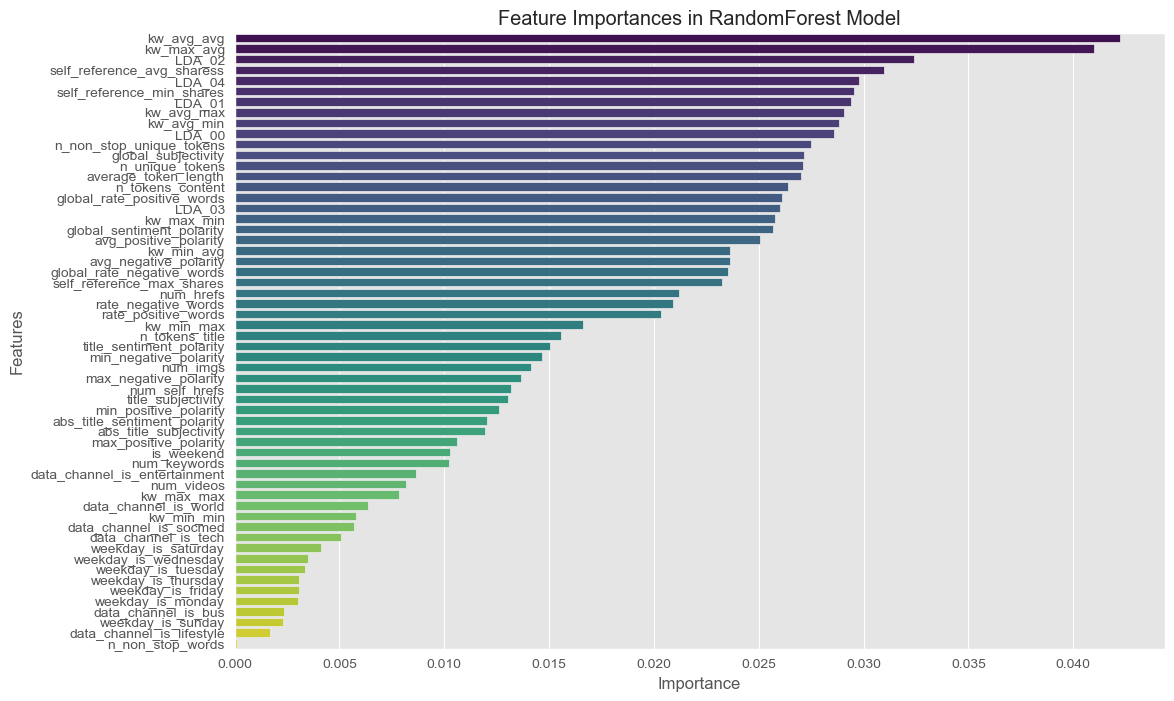

In [34]:
# Set the style
plt.style.use('ggplot')

# Plotting
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x="Importance", y="Feature", data=features, palette="viridis")  # Use seaborn to make the bar plot

# Add titles and labels
plt.title('Feature Importances in RandomForest Model')
plt.xlabel('Importance')
plt.ylabel('Features')

# Show the plot
plt.show()


## Cross-Validation

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.metrics import accuracy_score
import numpy as np
# Initialize StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=5, shuffle=True)
model = RandomForestClassifier(n_estimators=100, random_state=5)
scores = []  # to store accuracy scores of each fold

for train_index, val_index in skf.split(X_data, y_data):
    # Split data
    X_train, X_val = X_data.iloc[train_index], X_data.iloc[val_index]
    y_train, y_val = y_data.iloc[train_index], y_data.iloc[val_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict on validation set
    y_pred = model.predict(X_val)

    # Evaluate the model
    score = accuracy_score(y_val, y_pred)
    scores.append(score)

# Calculate mean and standard deviation of the scores across all folds
mean_score = np.mean(scores)
std_deviation = np.std(scores)

print(f"Average Accuracy: {mean_score:.2%}")
print(f"Standard Deviation of Accuracy: {std_deviation:.2%}")

Average Accuracy: 66.57%
Standard Deviation of Accuracy: 0.47%


#### Extra Work

## SHAP Value

SHAP values explain the impact of each feature on the prediction of a model, illustrating how much each feature contributes to the output, positively or negatively.

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# import shap
# import numpy as np
# 
# # Initialize and train a RandomForest model
# # model = RandomForestClassifier(n_estimators=100, random_state=5)
# # model.fit(X_train, y_train)
# 
# # Select a background dataset for SHAP explanations
# background = shap.sample(X_train, 100)
# 
# # Create a KernelExplainer using RandomForest's predict_proba function
# explainer = shap.TreeExplainer(model, background)
# 
# # Calculate SHAP values
# shap_values = explainer.shap_values(X_test, check_additivity=False)
# 
# # Visualize the SHAP values
# shap.summary_plot(shap_values, X_test)



 63%|=============       | 4933/7786 [466:14<269:38]       

In [ ]:
# shap.initjs()
# shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)